# This is demo for credit card fraud dataset
## Data resource https://www.kaggle.com/mlg-ulb/creditcardfraud


In [1]:
#pip install sklearn

In [2]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; 
sns.set()

In [3]:
df1 = pd.read_csv('creditcard.csv', delimiter=',')
df1.dataframeName = 'creditcard.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 284807 rows and 31 columns


In [4]:
df1.head(5)
df1.std()

Time      47488.145955
V1            1.958696
V2            1.651309
V3            1.516255
V4            1.415869
V5            1.380247
V6            1.332271
V7            1.237094
V8            1.194353
V9            1.098632
V10           1.088850
V11           1.020713
V12           0.999201
V13           0.995274
V14           0.958596
V15           0.915316
V16           0.876253
V17           0.849337
V18           0.838176
V19           0.814041
V20           0.770925
V21           0.734524
V22           0.725702
V23           0.624460
V24           0.605647
V25           0.521278
V26           0.482227
V27           0.403632
V28           0.330083
Amount      250.120109
Class         0.041527
dtype: float64

## First, let's look at the histogram of transaction time and amount

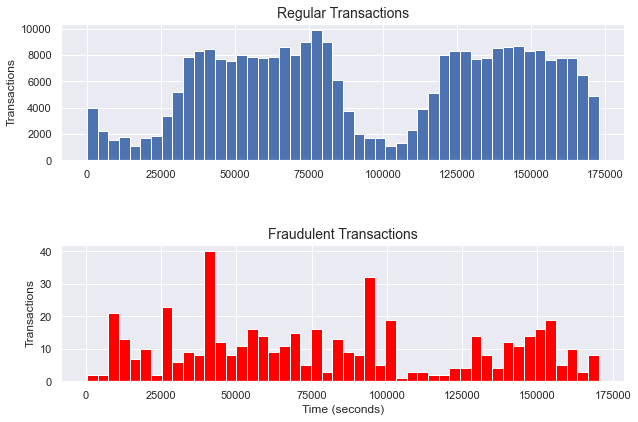

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 7))

ax[0].hist(df1['Time'][df1['Class'] == 0], bins=48)
ax[0].set_title('Regular Transactions', fontsize=14)
ax[0].set_ylabel('Transactions')

ax[1].hist(df1['Time'][df1['Class'] == 1], bins=48, facecolor='red')
ax[1].set_title('Fraudulent Transactions', fontsize=14)
ax[1].set_ylabel('Transactions')
ax[1].set_xlabel('Time (seconds)')

plt.tight_layout(pad=4.0)

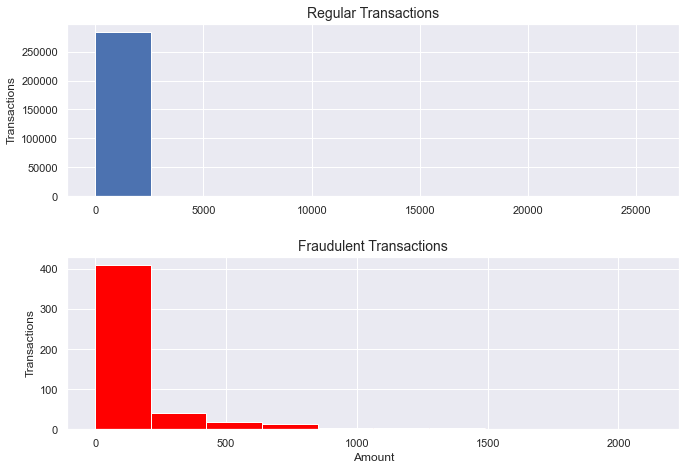

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 7))

ax[0].hist(df1['Amount'][df1['Class'] == 0], bins=10)
ax[0].set_title('Regular Transactions', fontsize=14)
ax[0].set_ylabel('Transactions')

ax[1].hist(df1['Amount'][df1['Class'] == 1], bins=10, facecolor='red')
ax[1].set_title('Fraudulent Transactions', fontsize=14)
ax[1].set_ylabel('Transactions')
ax[1].set_xlabel('Amount')
plt.tight_layout(pad=2.0)

## Now, let's try using box-whisker plot on transaction amount

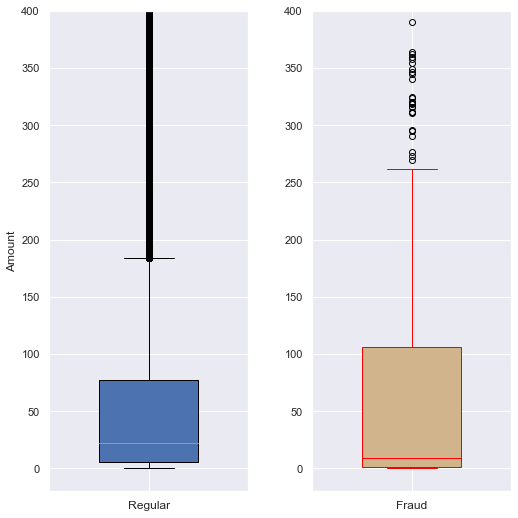

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))

ax[0].boxplot(df1['Amount'][df1['Class'] == 0], widths= 0.5 , patch_artist=True)
ax[0].set_ylim(-20, 400)
ax[0].set_xticklabels(['Regular'], fontsize=12)
ax[0].set_ylabel('Amount', fontsize=12)

bp = ax[1].boxplot(df1['Amount'][df1['Class'] == 1], widths= 0.5, patch_artist=True)
for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color='red')
for patch in bp['boxes']:
        patch.set(facecolor='tan')  
ax[1].set_ylim(-20, 400)
ax[1].set_xticklabels(['Fraud'], fontsize=12)

plt.tight_layout(pad=3.0)

## Let's take a look at the scatter plot to see how good the features are
## First let's look at the first 2 features

<AxesSubplot:xlabel='V1', ylabel='V2'>

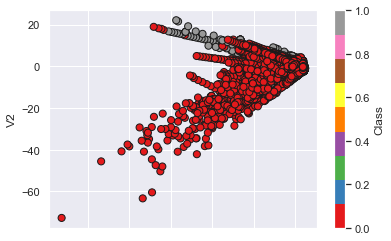

In [8]:
df1.plot.scatter(x='V1', y='V2', c = 'Class',cmap=plt.cm.Set1, edgecolor='k', s=50)


284315
492


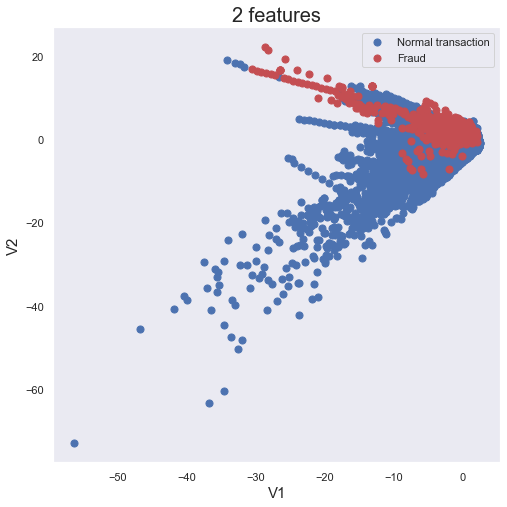

In [9]:
cl=df1['Class']
x = df1['V1']  # we only take the first two features.
y = df1['V2']
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('V1', fontsize = 15)
ax.set_ylabel('V2', fontsize = 15)
ax.set_title('2 features', fontsize = 20)
targets = ['Normal transaction', 'Fraud']
colors = ['b', 'r']

#ax.scatter(x, y, c= cl, s = 50)

for target, color in zip(targets,colors):
    
    indicesToKeep = cl == targets.index(target)
    print(indicesToKeep.sum())
    ax.scatter(x[indicesToKeep]
               , y[indicesToKeep]
               , c=color
               , s = 50)
ax.legend(targets)
ax.grid()

In [10]:
type(x.values)

numpy.ndarray

## How about first 3 features?

284315
492


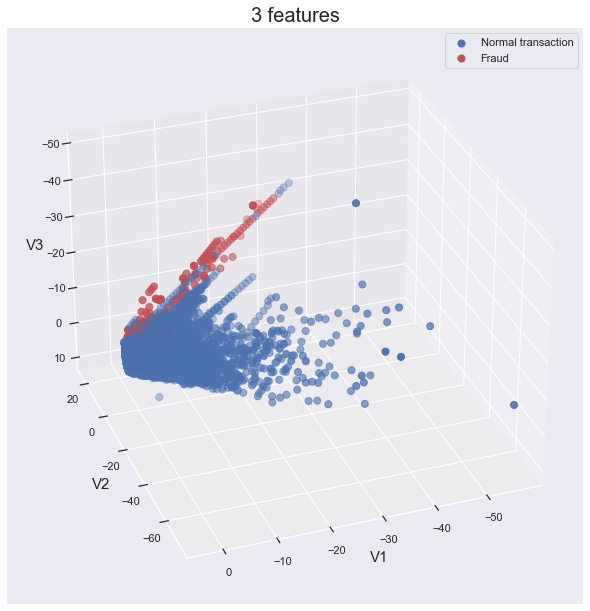

In [11]:
from mpl_toolkits.mplot3d import Axes3D
cl=df1['Class']
x = df1['V1']  # we only take the first three features.
y = df1['V2']
z = df1['V3']
fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig, elev=-150, azim=110)
ax.set_xlabel('V1', fontsize = 15)
ax.set_ylabel('V2', fontsize = 15)
ax.set_zlabel('V3', fontsize = 15)
ax.set_title('3 features', fontsize = 20)
targets = ['Normal transaction', 'Fraud']
colors = ['b', 'r']
for target, color in zip(targets,colors):
    
    indicesToKeep = cl == targets.index(target)
    print(indicesToKeep.sum())
    ax.scatter(x[indicesToKeep]
               , y[indicesToKeep]
               , z[indicesToKeep]
               , c=color
               , s = 50)
ax.legend(targets)
ax.grid()

## Now, let's take a look at the coorelation!

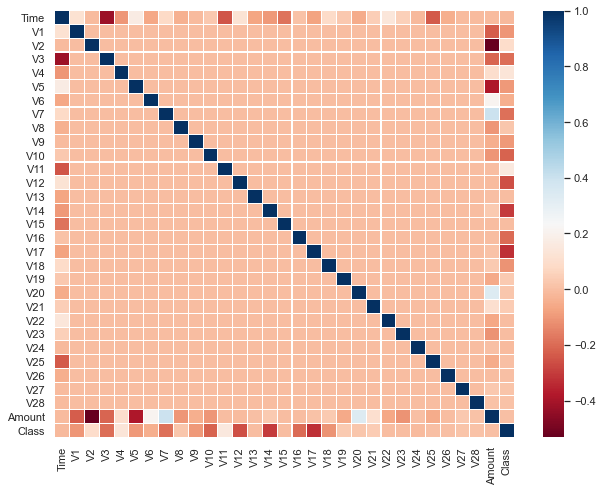

In [12]:

corr = df1.corr()
fig, ax = plt.subplots(figsize=(9, 7))

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="RdBu", ax=ax)
plt.tight_layout()

## Normalization

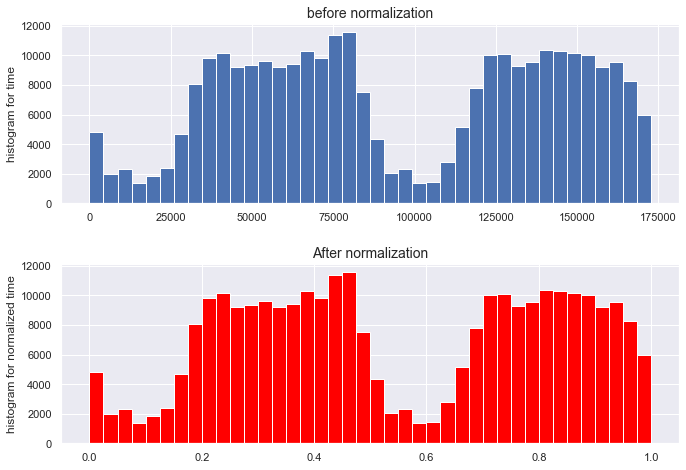

In [13]:
from sklearn import preprocessing
import numpy as np

x_array = np.array(df1['Time'])
normalized_X = preprocessing.normalize([x_array], norm = 'max')
normalized_X = normalized_X [0]
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 7))

ax[0].hist(x_array, bins=40)
ax[0].set_title('before normalization', fontsize=14)
ax[0].set_ylabel('histogram for time')

ax[1].hist(normalized_X, bins=40, facecolor='red')
ax[1].set_title('After normalization', fontsize=14)
ax[1].set_ylabel('histogram for normalized time')
plt.tight_layout(pad=2.0)

## standardization: using standardscaler from sklearn

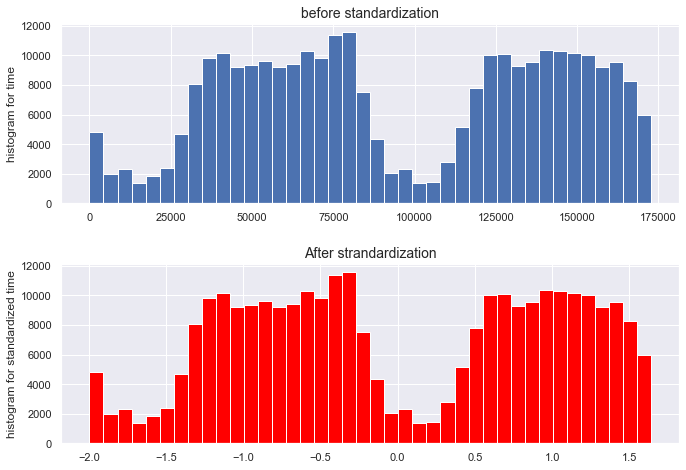

In [14]:
from sklearn.preprocessing import StandardScaler
df1_clean = df1.copy()

scaler = StandardScaler()
#df1_clean['std_amount'] = scaler.fit_transform(df1_clean['Amount'].values.reshape(-1, 1))
df1_clean['std_time'] = scaler.fit_transform(df1_clean['Time'].values.reshape(-1, 1))

df1_clean.drop(['Amount', 'Time'], axis=1, inplace=True)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 7))

ax[0].hist(df1['Time'], bins=40)
ax[0].set_title('before standardization', fontsize=14)
ax[0].set_ylabel('histogram for time')

ax[1].hist(df1_clean['std_time'], bins=40, facecolor='red')
ax[1].set_title('After strandardization', fontsize=14)
ax[1].set_ylabel('histogram for standardized time')
plt.tight_layout(pad=2.0)

## Let's check the feature's variance for the credit card fraud data that's after PCA

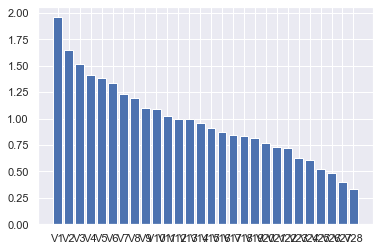

In [15]:
features = df1_clean.iloc[:, :28]
plt.bar(features.columns, features.std(axis=0))
plt.show()

# It's time to explore with machine learning algorithms!!!

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve

## decision tree

In [48]:
feature_cols = ['V1', 'V2', 'V3']
X = df1[feature_cols] 
y = df1['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9978114064346991


In [49]:
df1.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [56]:
feature_cols = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
X = df1[feature_cols] 
y = df1['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9993914071369217


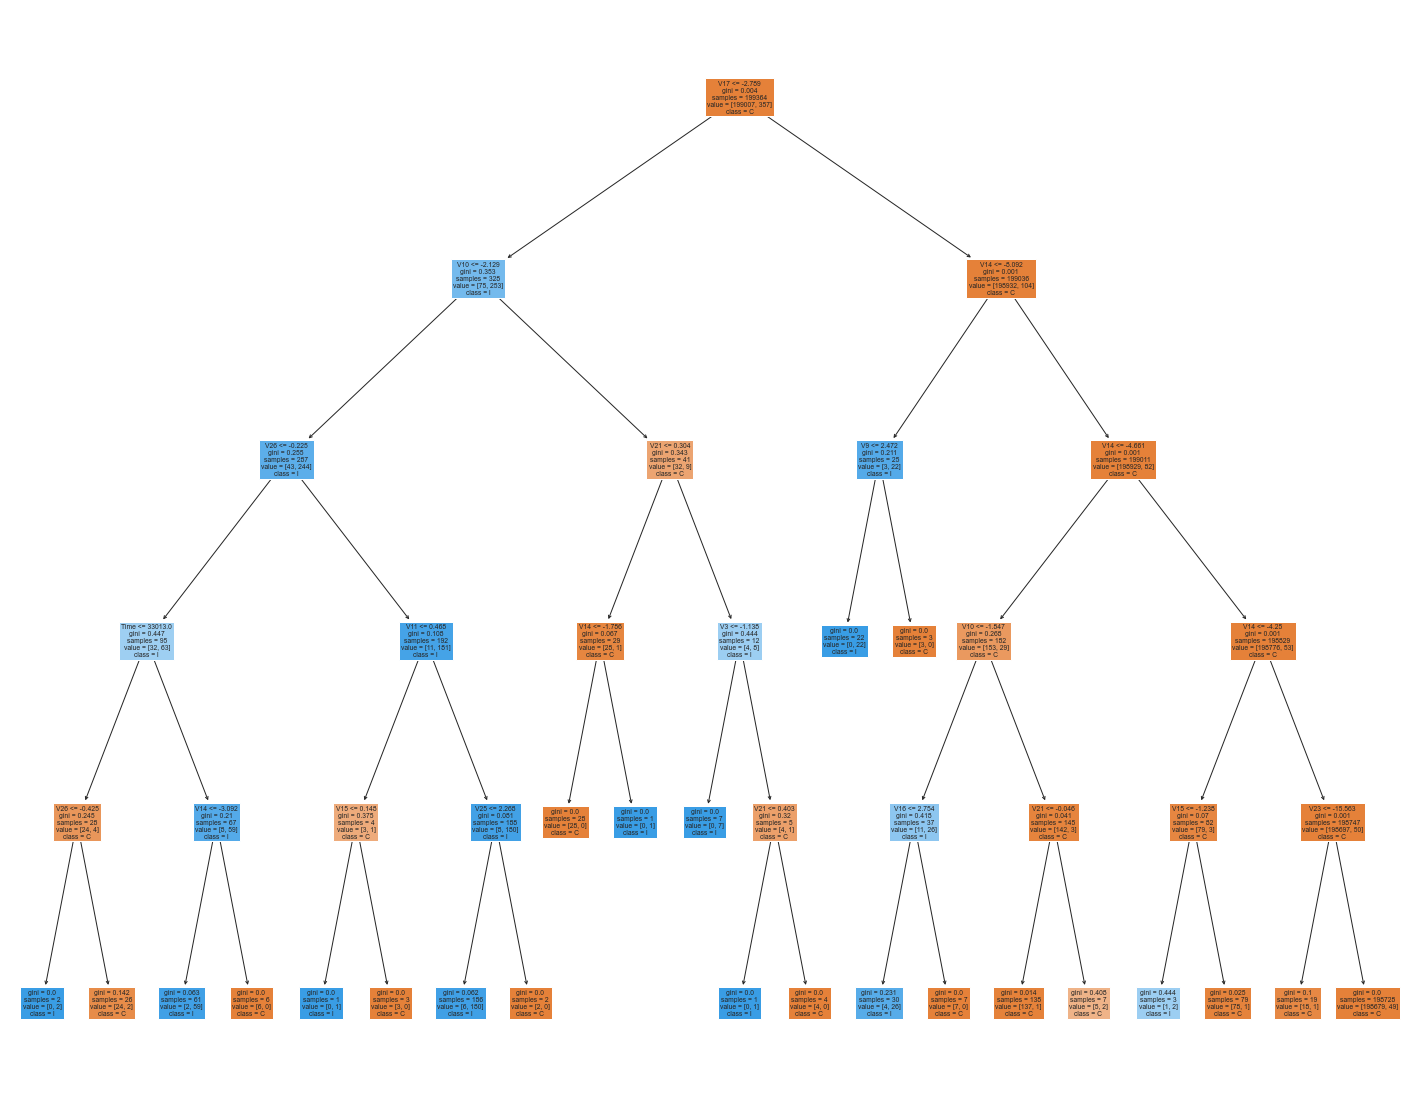

In [57]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_cols, 
                   class_names='Class',
                   filled=True)

In [18]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9984317030066828


## A simple comparison between decision tree and random forests

In [46]:
feature_cols = ['V28', 'V25']
X = df1[feature_cols] 
y = df1['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=1) # 10% training and 90% test
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9967619486047119


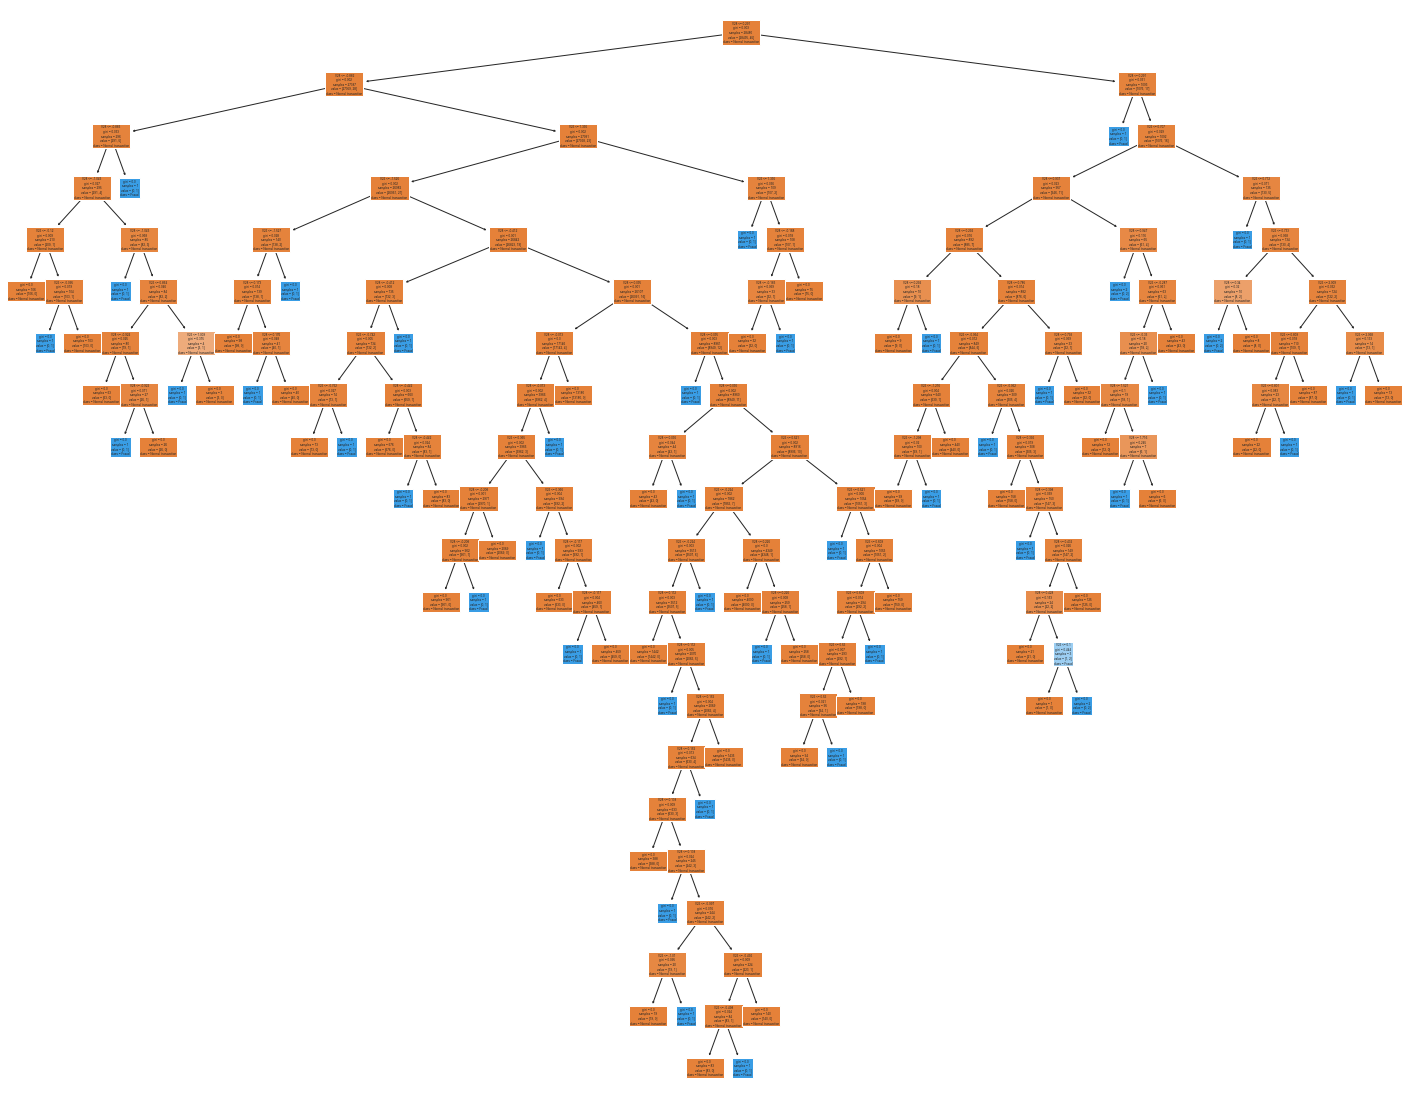

In [47]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_cols, 
                   class_names=['Normal transaction', 'Fraud'],
                   filled=True)

In [37]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.99824442996641


In [27]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9986540629742477


In [19]:
from sklearn import svm
clf = svm.SVC(probability = True)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9986891846026006


## Multinomial Naive Bayes model 

In [20]:
from sklearn.mixture import GaussianMixture
GMM_kf = GaussianMixture(n_components=2, random_state=0).fit(X_train,y_train) 
y_pred = GMM_kf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5691396603583676
